In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/df_clean.csv', sep=',')

# Erstelle eine Kopie des Dataframes
df_copy = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17803 entries, 0 to 17802
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LeagueCountry             17803 non-null  object 
 1   League                    17803 non-null  object 
 2   NationalLeagueLevel       17803 non-null  int64  
 3   Club                      17803 non-null  object 
 4   No                        17803 non-null  float64
 5   Name                      17803 non-null  object 
 6   Value                     17803 non-null  float64
 7   ValueLastUpdate           17803 non-null  object 
 8   HighestValue              17803 non-null  float64
 9   HighestValueDate          17803 non-null  object 
 10  Age                       17800 non-null  float64
 11  Height                    16713 non-null  float64
 12  Nationality               17803 non-null  object 
 13  Foot                      17803 non-null  object 
 14  Positi

In [3]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder-Objekt erzeugen
le = LabelEncoder()

# Liste aller Spalten, die kategorische Variablen enthalten
cat_cols = ['LeagueCountry', 'League', 'Club', 'Name', 'ValueLastUpdate', 'HighestValueDate',
            'Nationality', 'Foot', 'Position', 'Consultancy', 'Supplier',
            'InternationalTeam', 'Instagram', 'PositionCategory']

# Jede Spalte in cat_cols label encoden
for col in cat_cols:
    if df[col].dtype == 'object':  # nur Spalten vom Typ 'object' label encoden
        df[col] = le.fit_transform(df[col].astype(str))

In [4]:
# X und y festlegen
y = df["Value"]
X = df.drop("Value", axis = 1)

In [5]:
from sklearn.model_selection import train_test_split
# Test- und Trainingsdaten Aufteilung
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
# Import für K-Nearest-Neighbor-Imputer
from sklearn.impute import KNNImputer

# K-Nearest-Neighbor-Imputer verwenden um fehlende Werte in den Trainingsdaten zu ersetzen
imputer = KNNImputer()
imputer.fit(X_train)
X_train_imputed = imputer.transform(X_train)

In [7]:
# Namen der Features des imputierten Datensatzes bekommen
names = imputer.feature_names_in_

In [8]:
# Dataframe aus den imputierten Daten erstellen
X_train_imputed = pd.DataFrame(X_train_imputed, columns=names, index = X_train.index)
X_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13352 entries, 12181 to 15795
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LeagueCountry             13352 non-null  float64
 1   League                    13352 non-null  float64
 2   NationalLeagueLevel       13352 non-null  float64
 3   Club                      13352 non-null  float64
 4   No                        13352 non-null  float64
 5   Name                      13352 non-null  float64
 6   ValueLastUpdate           13352 non-null  float64
 7   HighestValue              13352 non-null  float64
 8   HighestValueDate          13352 non-null  float64
 9   Age                       13352 non-null  float64
 10  Height                    13352 non-null  float64
 11  Nationality               13352 non-null  float64
 12  Foot                      13352 non-null  float64
 13  Position                  13352 non-null  float64
 14  Co

In [9]:
# Imputation für die Traingsdaten separat vornehmen
X_test_imputed = imputer.transform(X_test)
X_test_imputed = pd.DataFrame(X_test_imputed, columns = names, index=X_test.index)
X_test_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4451 entries, 3222 to 15818
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LeagueCountry             4451 non-null   float64
 1   League                    4451 non-null   float64
 2   NationalLeagueLevel       4451 non-null   float64
 3   Club                      4451 non-null   float64
 4   No                        4451 non-null   float64
 5   Name                      4451 non-null   float64
 6   ValueLastUpdate           4451 non-null   float64
 7   HighestValue              4451 non-null   float64
 8   HighestValueDate          4451 non-null   float64
 9   Age                       4451 non-null   float64
 10  Height                    4451 non-null   float64
 11  Nationality               4451 non-null   float64
 12  Foot                      4451 non-null   float64
 13  Position                  4451 non-null   float64
 14  Cons

In [14]:
import matplotlib.pyplot as plt
from pandas import DataFrame
# Kopiert aus TreesForestsEnsembles.ipynb
def plot_variable_importance(model, X_train):
    imp=DataFrame({"imp":model.feature_importances_, "names":X_train.columns}).sort_values("imp", ascending=True)
    fig, ax = plt.subplots(figsize=(imp.shape[0]/6,imp.shape[0]/5), dpi=300)
    ax.barh(imp["names"],imp["imp"], color="green")
    ax.set_xlabel('\nVariable Importance')
    ax.set_ylabel('Features\n')
    ax.set_title('Variable Importance Plot\n')
    plt.show()

In [12]:
# Import Functions
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Instantiate Model
model = XGBRegressor()

# fit model
model.fit(X_train, y_train)

#make prediction
y_pred = model.predict(X_test)

# Evaluate Model Performance
mean_squared_error(y_test, y_pred, squared=False)

1827765.424300714

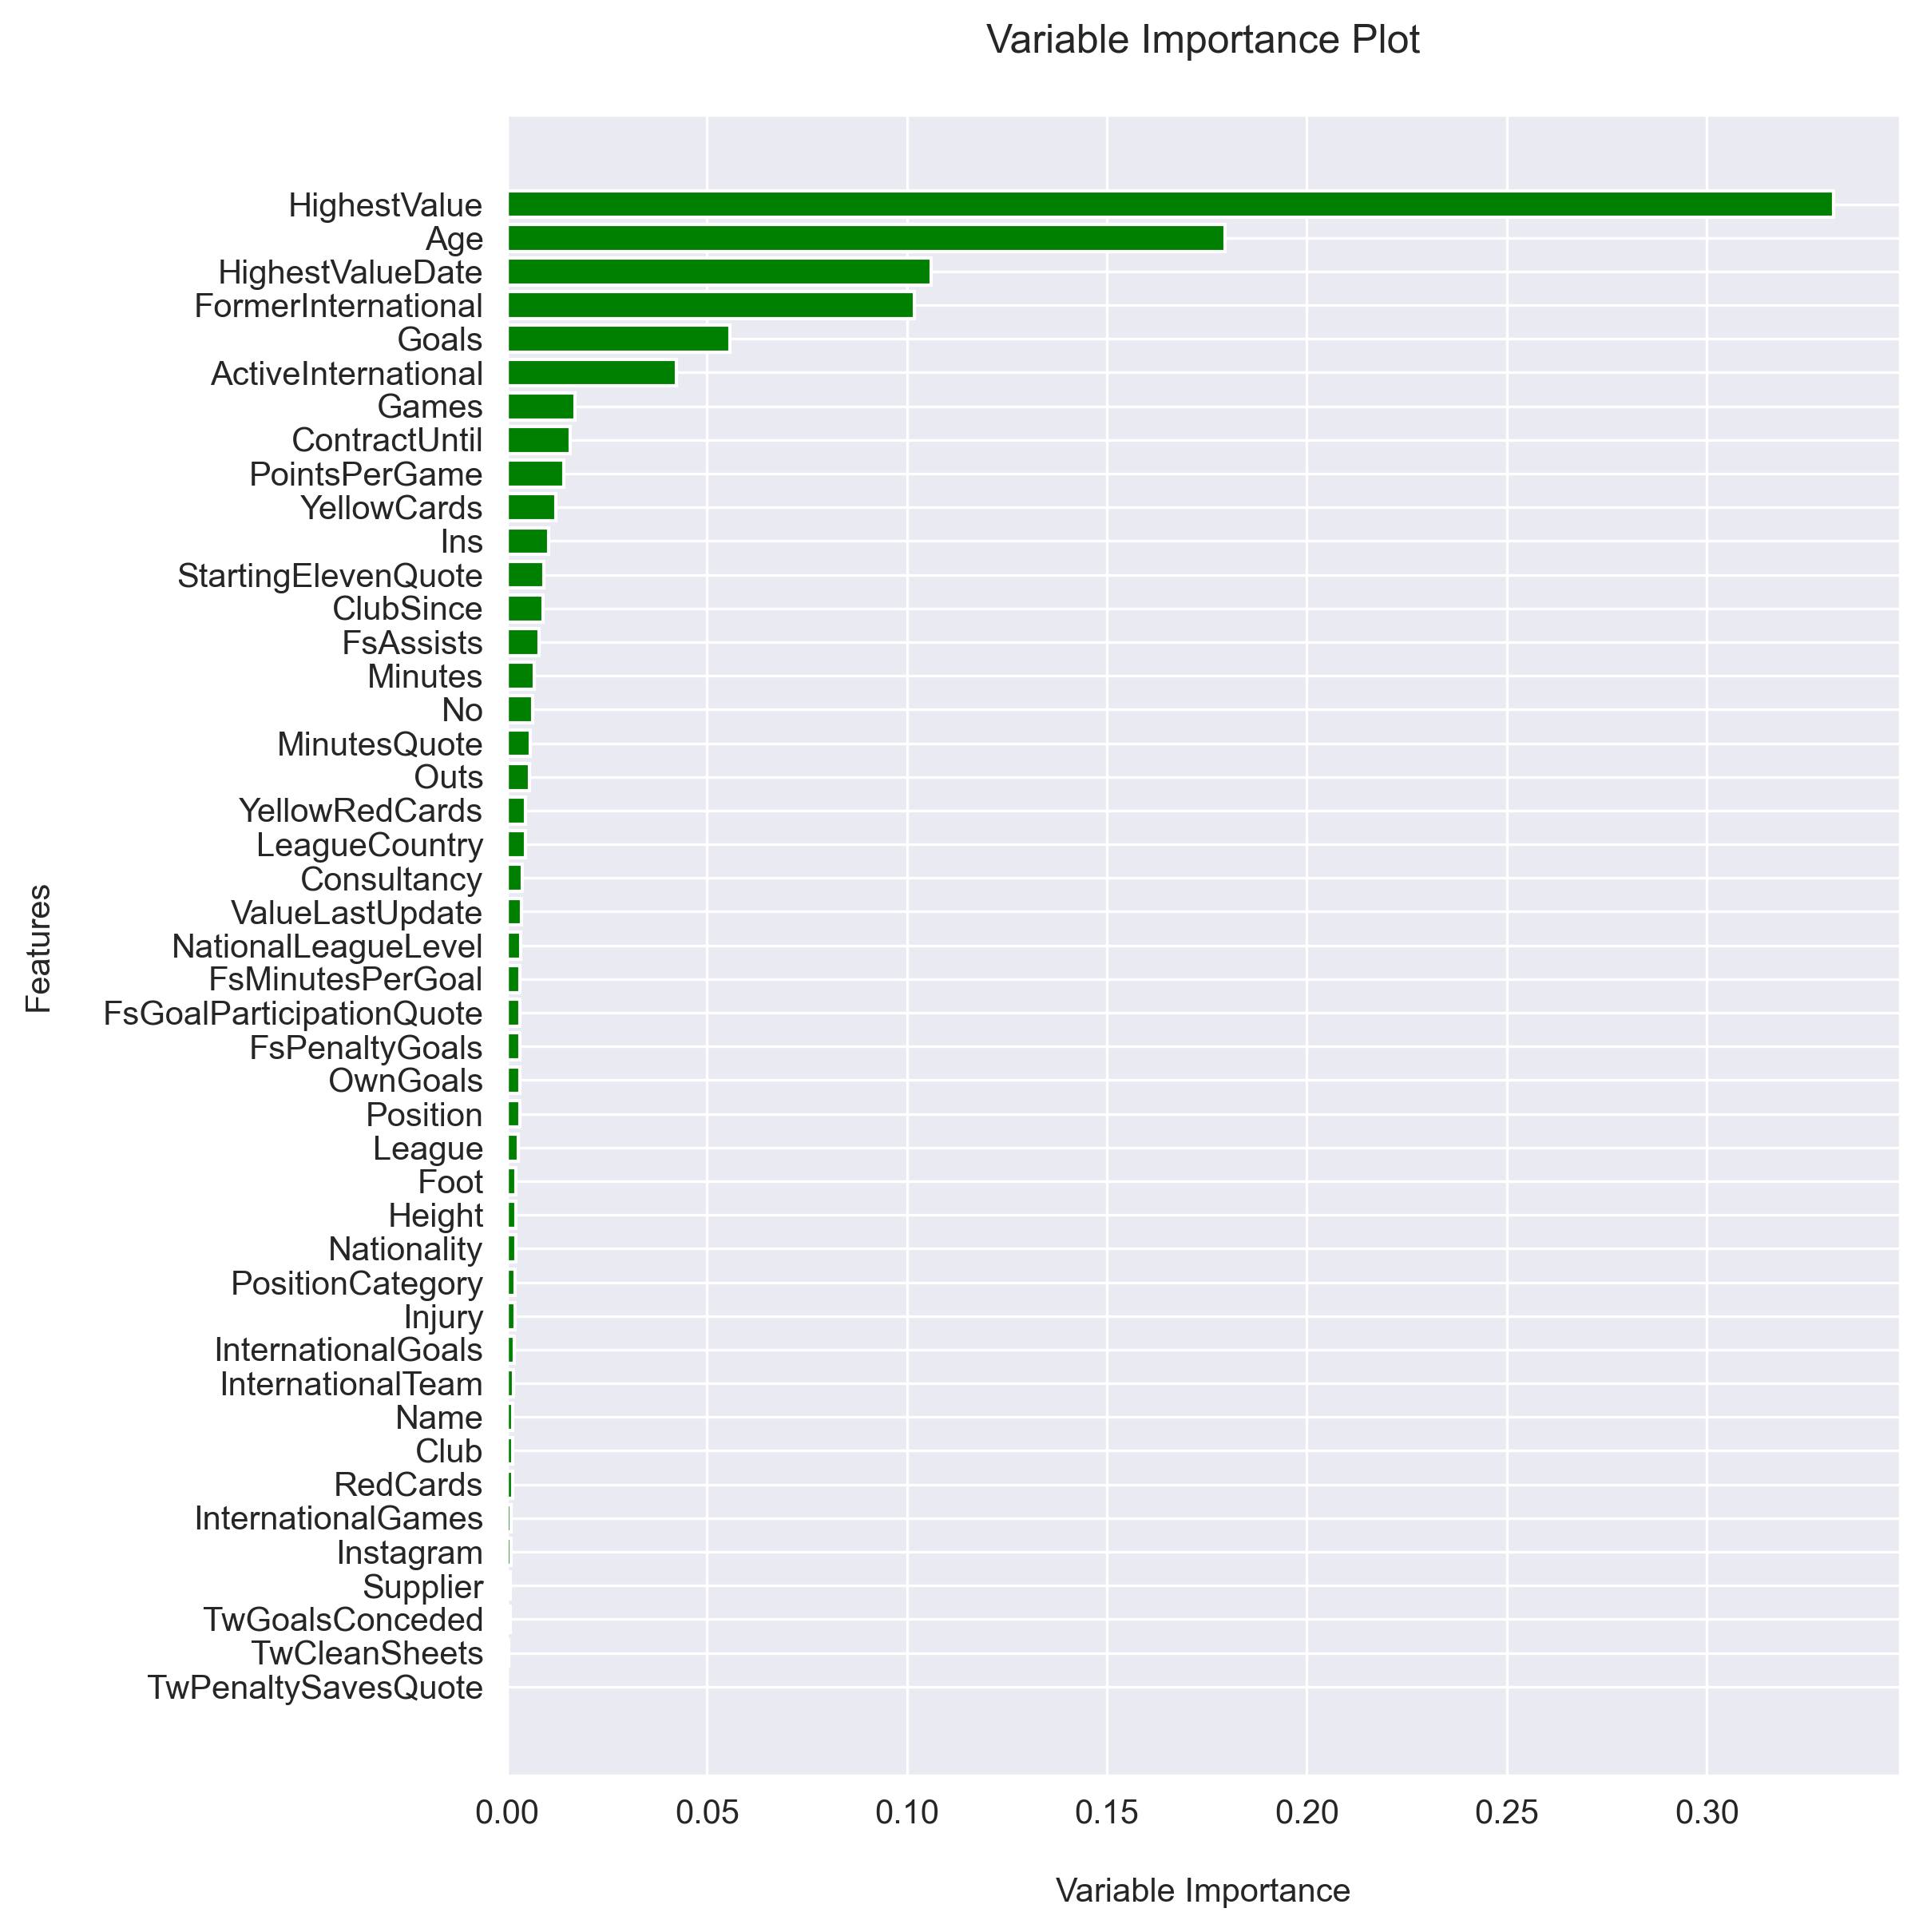

In [15]:
plot_variable_importance(model, X_train)